In [1]:
import numpy as np
import matplotlib.pyplot as plt

from audio_ot import *

In [2]:
source_support = np.array([100, 350])
source = np.array([1, .3])
source /= np.sum(source)

target_support = np.array([200, 700])
target = np.array([.8, .5])
target /= np.sum(target)

M = cost_matrix(source_support, target_support)

In [3]:
plan = ot.lp.emd(source, target, M)

alpha = 0.5

def interpolate_support(source_support, target_support, alpha):
    support = []

    for f_s in source_support:
        for f_t in target_support:
            f_alpha = int((1 - alpha) * f_s + alpha * f_t)

            if f_alpha not in support:
                support.append(f_alpha)

    return np.array(support)

interpolated_support = interpolate_support(source_support, target_support, alpha)

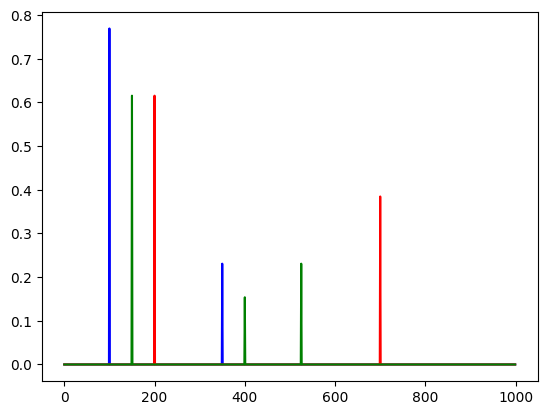

In [4]:
def generate_dirac(support, values, size=1000):
    dirac = np.zeros(size)
    for i, f in enumerate(support):
        dirac[f] = values[i]
    return dirac

source_dirac = generate_dirac(source_support, source)
target_dirac = generate_dirac(target_support, target)
interpolated_dirac = generate_dirac(interpolated_support, plan.flatten())

plt.plot(np.arange(0, 1000), source_dirac, c='b', label='source')
plt.plot(np.arange(0, 1000), target_dirac, c='r', label='target')
plt.plot(np.arange(0, 1000), interpolated_dirac, c='g', label='interpolated')

In [5]:
new_plan = np.zeros_like(plan)
for i, index in enumerate(plan.argmax(axis=0)):
    new_plan[i, index] = plan.T[i].sum() * alpha

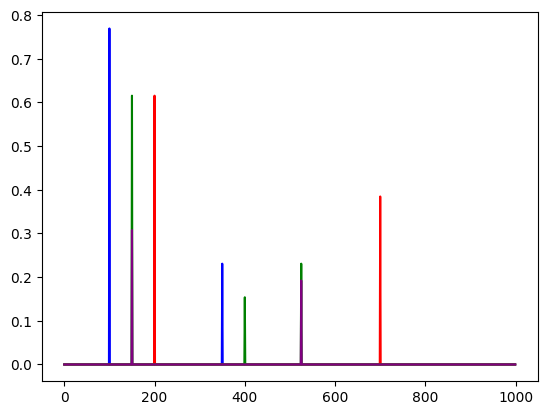

In [6]:
source_dirac = generate_dirac(source_support, source)
target_dirac = generate_dirac(target_support, target)
interpolated_dirac = generate_dirac(interpolated_support, plan.flatten())
new_interpolated_dirac = generate_dirac(interpolated_support, new_plan.flatten())

plt.plot(np.arange(0, 1000), source_dirac, c='b', label='source')
plt.plot(np.arange(0, 1000), target_dirac, c='r', label='target')
plt.plot(np.arange(0, 1000), interpolated_dirac, c='g', label='interpolated')
plt.plot(np.arange(0, 1000), new_interpolated_dirac, c='purple', label='new interpolation')